In [1]:
from twitch import commons
from IPython.display import Image
import pandas as pd

In [2]:
global_counts = commons.read_word_count_file("../../data/word_counts/global_word_counts.csv")
print(len(global_counts))

stopwords_list = commons.get_stopwords()
global_counts = {k: v for k, v in global_counts.items() if v >= 1000 and (k not in stopwords_list) and (len(k) > 2)}
print(len(global_counts))

global_corpus_size = sum(global_counts.values())
print('Global Corpus Size : ' + str(global_corpus_size))

30243841
109123
Global Corpus Size : 3039973438


In [13]:
cluster_users = {line.split(',')[0] : line.split(',')[1].strip().split(' ') for line in open('./cluster_users.csv.dat',
                                                                                            'r')}

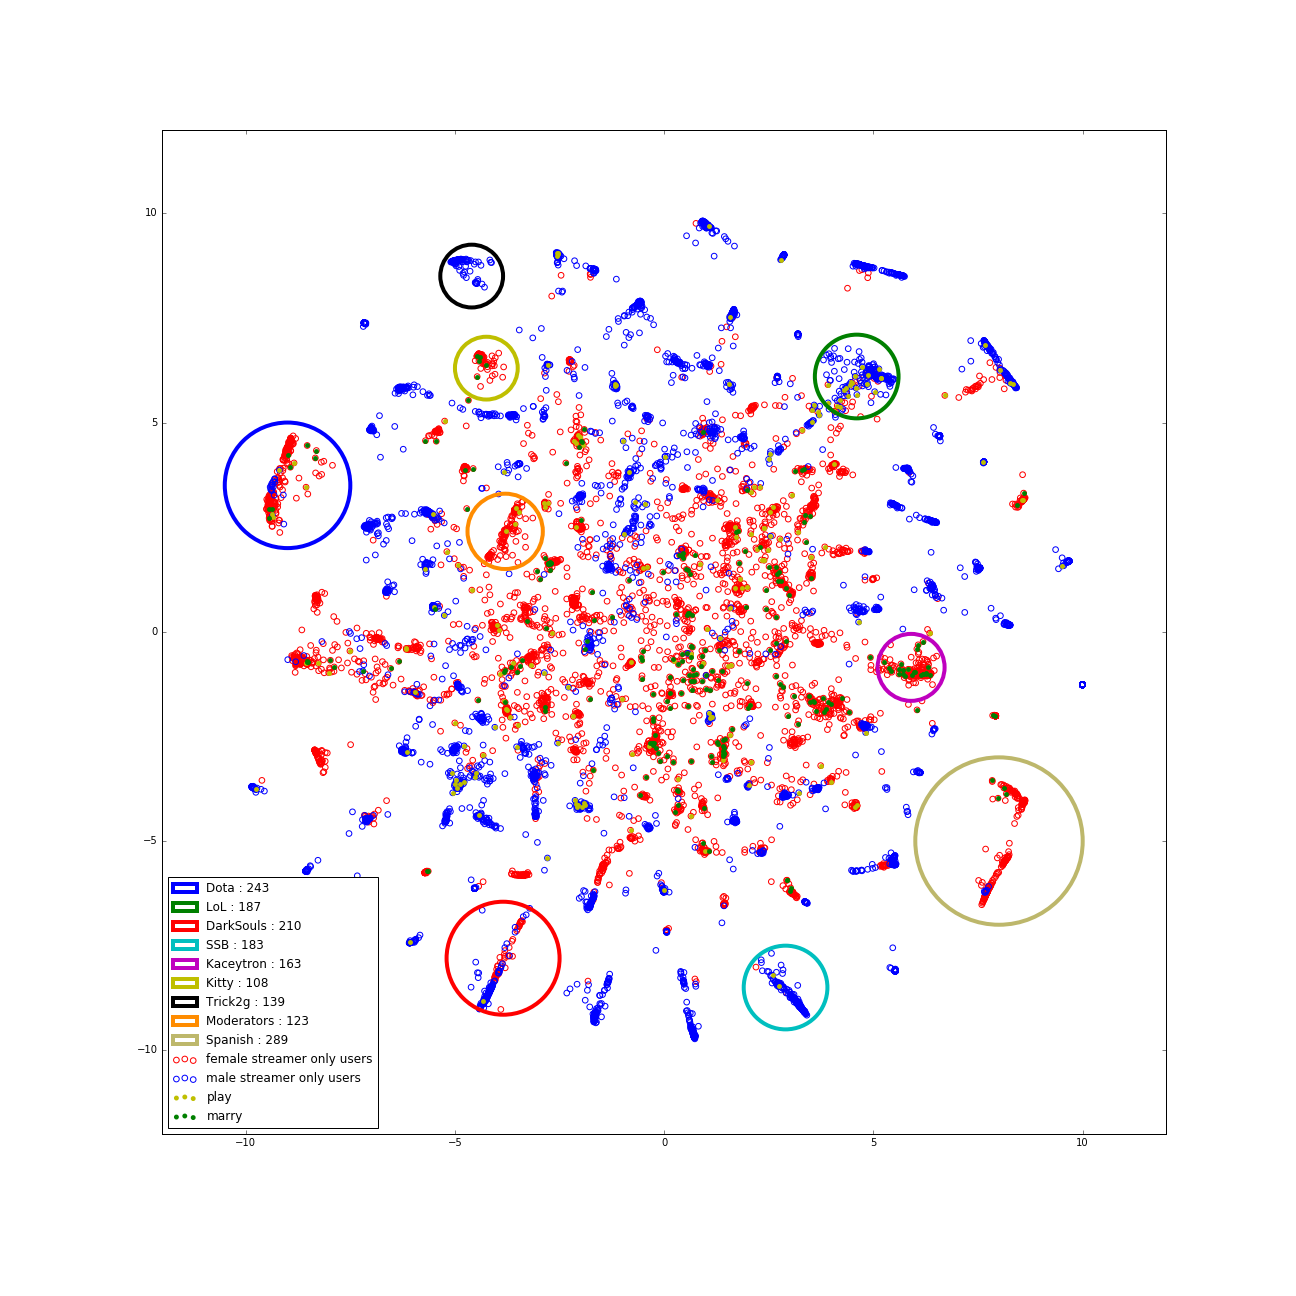

In [14]:
Image(filename='user_clusters.png')

In [15]:
user_chat_logs = {line.split(',')[0] : line.split(',')[1].strip() for line in open('./user_all_message.csv.dat', 'r')}

In [6]:
def get_cluster_word_counts(cluster):
    user_list = cluster_users[cluster]
    wordfreq = {}
    channelfreq = {}
    for user in user_list:
        wordlist = user_chat_logs[user].split()
        for w in wordlist:
            if w not in global_counts:
                continue
            
            if w in wordfreq:
                wordfreq[w] += 1
                channelfreq[w].add(user)
            else:
                wordfreq[w] = 1
                channelfreq[w] = set()
                channelfreq[w].add(user)

    for w in channelfreq:
        channelfreq[w] = len(channelfreq[w])
    return wordfreq, channelfreq

def get_all_user_word_counts(skip_users=[]):
    wordfreq = {}
    channelfreq = {}
    
    records_df = pd.read_csv('./user_chat_clustering_selected_sample.csv.dat')
    records = records_df.values.tolist()
    users_sample = [r[0] for r in records]
    
    for user in users_sample:
        if user in skip_users:
            continue
        wordlist = user_chat_logs[user].split()
        for w in wordlist:
            if w not in global_counts:
                continue
            if w in wordfreq:
                wordfreq[w] += 1
                channelfreq[w].add(user)
            else:
                wordfreq[w] = 1
                channelfreq[w] = set()
                channelfreq[w].add(user)

    for w in channelfreq:
        channelfreq[w] = len(channelfreq[w])
    return wordfreq, channelfreq

In [125]:
word_counts_A, channel_counts_A = get_cluster_word_counts('Dota')
word_counts_B, channel_counts_B = get_cluster_word_counts('LoL')

top_words_df_AB =  commons.calculate_log_odds_idp(global_counts, word_counts_A, channel_counts_A, word_counts_B,
                                           channel_counts_B)

In [126]:
top_words_df_AB[top_words_df_AB.male_channel_counts >= top_words_df_AB.male_channel_counts.max() * 0.5].head(10)

,word,global_count,female_corpus_counts,male_corpus_counts,female_channel_counts,male_channel_counts,log_odds_z_score
80780,time,9827078,7424,982,201,152,1.224676
93404,kappa,42503114,14977,2657,179,107,0.865634
16829,dont,7895739,4224,1853,222,176,0.389536
18902,cant,3362958,1720,790,184,147,0.223024
26758,last,3330848,1211,367,139,104,0.192079
35618,today,3135352,1035,247,148,93,0.183769
55009,much,5851677,1914,749,179,134,0.161755
62675,name,4903091,1317,365,144,110,0.140309
73259,isnt,1078756,848,553,123,111,0.123919
32522,never,4126405,1192,483,162,107,0.096544


In [19]:
users = cluster_users['Moderators']

In [24]:
user_chat_logs[users[50]]

'if ara was playing a game like titalfall or a gundam game gamesize too im a sailor when i talk to my family over phone to help with pc but non family saint get a cat statue they have a pig statue thingy you made your character named echo o does echo have any babies yet sims nrop see if i played id make a serial baby maker rathamon i would try it in real life if i could xd but the thing is you know those times you need hugs just because well thats me   xd xd yeah i doubt i could handle a babyi cant handle myself anyways p ok ara dont diethe plan wow i just realized the chat makes it red if you say ara devil may poop should be devil june poop devil   poop not devil   poop is nervious without  skirt lmfao spank me i like it xd wtf omg ara thats like falling off a bike and saying only a hate crime if  hates you cyclopshavokvulcan yeah that makes sense too mine comes from personal experience though more about getting grass stains on pants when falling down off bike would you consider the m